In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix


In [74]:
# Defining Butterworth Low Pass Filter and Normalizing functions

def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))


In [75]:
df = pd.read_csv('1002_H.csv',sep=";", header=None)

In [76]:
df = df[(df[1] == 0) | (df[1] == 1)]

In [77]:
r_peak = df[0].values

In [78]:
v1_v5 = pd.read_csv('1002.csv', header= None)

In [79]:
v1 = v1_v5[0].values

In [80]:
# Creating windows and storing in lists 

x = 1024
total_values = 1350000
loop_count = total_values // x
r_peak_package = []
sig_package = []

for r in range(loop_count):
    start_index = r*x
    end_index = r*x + x
    sig = v1[start_index : end_index]
    r_index = r_peak[(r_peak > start_index) & (r_peak < end_index)]
    r_peak_package.append(r_index)
    sig_package.append(sig)
    
loop_count, len(r_peak_package)

(1318, 1318)

In [81]:
r_peak_list = []

for i in range(len(r_peak_package)):
    start_index = i * 1024
    r_peak_p = np.array(r_peak_package[i])
    r_peak_p = r_peak_p - start_index
    r_peak_list.append(r_peak_p)

In [82]:
# Creating 512 index sized and 20 index inersected windows 

signal = np.array(v1)
window_size = 512
intersection = 20

window = [signal[i:i+window_size] 
          for i in range(0, len(signal) - window_size + 1, window_size - intersection)]

In [83]:
# Applying butter filter and normalizing functions for lists

r_peak_list_new = []
signal_list_new = []
cutoff_freq = 25
sampling_rate = 125
r_peak_array = np.array(r_peak)
loop_count = len(v1) // 512
for i in range(len(v1)):
    if i == 0:
        start_index = i*512
        end_index = i*512 + 512
    else:
        start_index = end_index - 20
        end_index = start_index + 512
    
    if end_index > len(v1):
        break
        
    sig = v1[start_index:end_index]
    filtered_sig = butter_lowpass_filter(sig, cutoff_freq, sampling_rate)
    filtered_sig = NormalizeData(filtered_sig)
    r_ = r_peak_array[(r_peak_array > start_index) & (r_peak_array < end_index)]
    r_ = r_ - start_index
    r_peak_list_new.append(r_)
    signal_list_new.append(filtered_sig)

In [84]:
# Creating Zero Vector with 1 value at peak points 10 indices long, starting and ending 7 indices out. 

vector_length = 512
vector = np.zeros(vector_length)

vector_list = []

for i in range(len(r_peak_list_new)):
    r_array = r_peak_list_new[i]

    vector = np.zeros(vector_length)
    
    for a in range(len(r_array)):
        r_ = r_array[a]
        if (r_ >= 7) and (r_ < 505):
            vector[r_ -5: r_ +5] = 1
    vector_list.append(vector)

In [85]:
model = load_model('model.h5')
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 512, 1)]     0           []                               
                                                                                                  
 conv1d_32 (Conv1D)             (None, 512, 64)      256         ['input_5[0][0]']                
                                                                                                  
 conv1d_33 (Conv1D)             (None, 512, 64)      12352       ['conv1d_32[0][0]']              
                                                                                                  
 max_pooling1d_6 (MaxPooling1D)  (None, 256, 64)     0           ['conv1d_33[0][0]']              
                                                                                            

In [86]:
# Use model for predicting vectors at R-Peaks

prediction = []

for i in range(0, len(signal_list_new), 10):
    package_1 = signal_list_new[i: i + 10]
    package_1 = np.array(package_1)
    predict = model.predict(package_1)
    for j in range(len(predict)):
        prediction.append(predict[j])
    

1/1 [==============================] - 0s 119ms/step


KeyboardInterrupt: 

In [ ]:
vector_list_s = np.array(vector_list).reshape(2743, 512, 1)

(2743, 512, 1)

In [ ]:
# Rounding prediction values to 1 and 0 

prediction_round = np.array(prediction)

rounded_prediction = np.round(prediction_round).astype(int)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [ ]:
# Using IoU method to get accuracy

iou_score = []
for i in range(len(signal_list_new)):
    gt = vector_list_s[i]
    p = rounded_prediction[i]
    intersection = np.sum((p == 1) & (gt == 1))
    union = np.sum((p == 1) | (gt == 1))
    
    iou = intersection / union 
    iou_score.append(iou)
iou_score
 

[0.4918032786885246,
 1.0,
 0.971830985915493,
 0.8571428571428571,
 0.9836065573770492,
 0.9516129032258065,
 0.9397590361445783,
 1.0,
 0.9836065573770492,
 1.0,
 1.0,
 1.0,
 0.9836065573770492,
 1.0,
 1.0,
 0.9672131147540983,
 0.9836065573770492,
 0.9859154929577465,
 1.0,
 1.0,
 1.0,
 0.967741935483871,
 1.0,
 1.0,
 0.9859154929577465,
 0.9516129032258065,
 0.9672131147540983,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9836065573770492,
 0.9836065573770492,
 1.0,
 0.9672131147540983,
 1.0,
 1.0,
 0.967741935483871,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9672131147540983,
 1.0,
 0.971830985915493,
 0.9516129032258065,
 0.9672131147540983,
 1.0,
 1.0,
 0.9672131147540983,
 0.9672131147540983,
 0.8571428571428571,
 0.9836065573770492,
 0.9833333333333333,
 0.971830985915493,
 1.0,
 1.0,
 0.9833333333333333,
 1.0,
 0.9583333333333334,
 0.9508196721311475,
 0.967741935483871,
 0.9672131147540983,
 1.0,
 0.9722222222222222,
 0.9672131147540983,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9672131147540

In [ ]:
iou_below_half = [i for i in iou_score if i <= 0.6]
iou_below_half

[0.4918032786885246, 0.52, 0.4]

In [ ]:
iou_low_indices = list(filter(lambda x: iou_score[x] < 0.6, range(len(iou_score))))

iou_low_indices

[0, 622, 992]

In [ ]:
iou_1 = [i for i in iou_score if i == 1]
len(iou_1)

991

In [ ]:
iou_high = [i for i in iou_score if 1 > i > 0.95]
len(iou_high)

1257

In [ ]:
iou_fine = [i for i in iou_score if 0.95 >= i > 0.9]
len(iou_fine)

386

In [ ]:
iou_mid = [i for i in iou_score if 0.9 >= i > 0.8]
len(iou_mid)

92

In [ ]:
iou_low = [i for i in iou_score if 0.8 >= i >= 0.7]
len(iou_low)

14

In [ ]:
iou_bad = [i for i in iou_score if 0.6 >= i]
len(iou_bad)

3

In [ ]:
iou_bad_indices = list(filter(lambda x: iou_score[x] <= 0.6, range(len(iou_score))))
iou_bad_indices

[0, 622, 992]

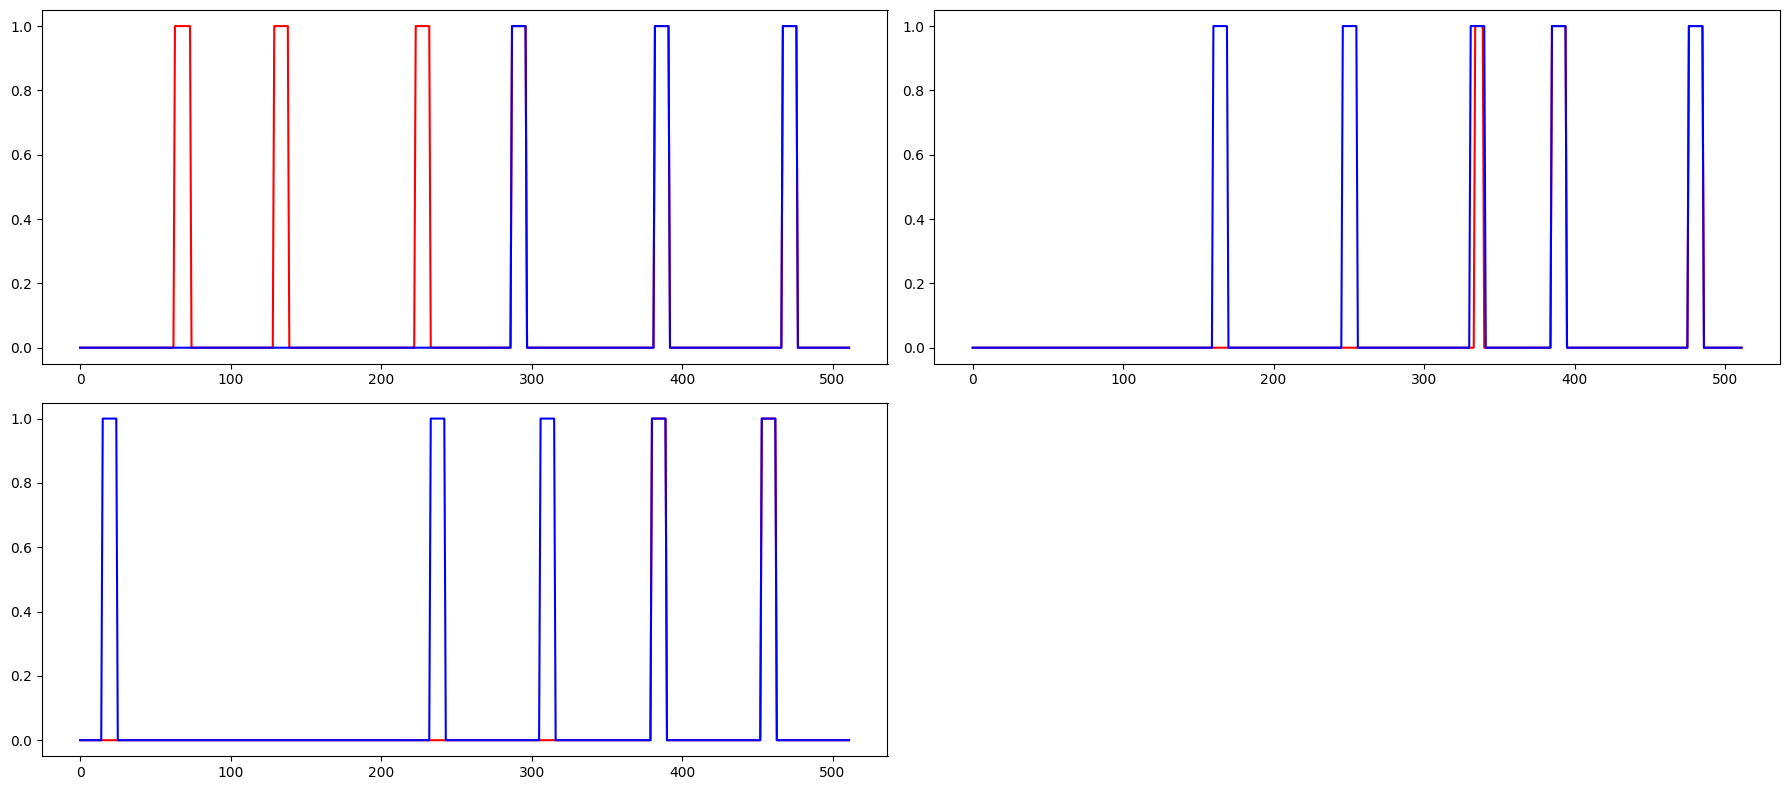

In [ ]:
plt.figure(figsize=(18, 8))
plt.subplot(2, 2, 1)
plt.plot(rounded_prediction[0], color = 'red')
plt.plot(vector_list_s[0], color = 'blue')

plt.subplot(2, 2, 2)
plt.plot(rounded_prediction[622], color = 'red')
plt.plot(vector_list_s[622], color = 'blue')

plt.subplot(2, 2, 3)
plt.plot(rounded_prediction[992], color = 'red')
plt.plot(vector_list_s[992], color = 'blue')

plt.tight_layout()
plt.show()

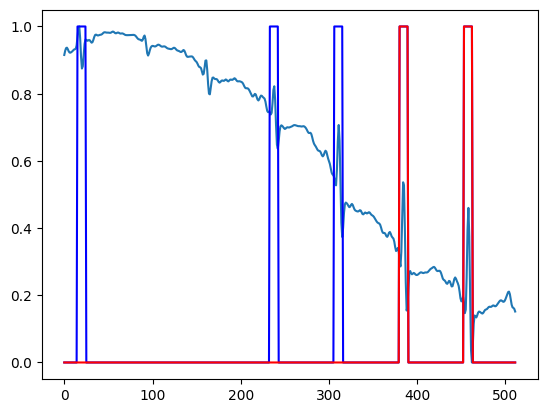

In [ ]:
plt.plot(signal_list_new[992])
plt.plot(vector_list_s[992], color = 'blue')
plt.plot(rounded_prediction[992], color = 'red')


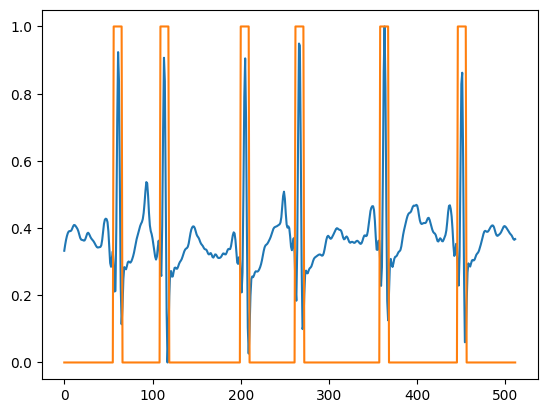

In [ ]:
plt.plot(signal_list_new[1])
plt.plot(rounded_prediction[1])